In [ ]:
import gzip
import simplejson
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/drive')

def parse(filename):
  f = gzip.open(filename, 'rt')
  entry = {}
  for l in f:
    l = l.strip()
    colonPos = l.find(':')
    if colonPos == -1:
      yield entry
      entry = {}
      continue
    eName = l[:colonPos]
    rest = l[colonPos+2:]
    entry[eName] = rest
  yield entry

file_path =  "/content/drive/My Drive/Colab Notebooks/nokia/Cell_Phones_&_Accessories.txt.gz"

# save all records
records = [e for e in parse(file_path)]

# put all records in dataframe
df = pd.DataFrame(records)

# set parameters
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
df['review/time'] = pd.to_datetime(df['review/time'], unit='s')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-369-a5c51591a104>:37: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['review/time'] = pd.to_datetime(df['review/time'], unit='s')


In [ ]:
#DATA CLEANING

#drop empty row
empty_rows = df[df.isna().all(axis=1)].index.tolist()
print("Empty rows:", empty_rows)
df_cleaned = df.dropna(how='all') #drop row with all empty columns

#check if there is any NaN values
count_nan = df_cleaned.isna().sum()
print("Count NaN in each column:")
print(count_nan)


#check if types are correct/unified
print("Review/score type: ",df_cleaned['review/score'].dtype)
unique_types_1 = df_cleaned['review/score'].apply(type).unique()
print(unique_types_1)

print("Review/helpfulnes",df_cleaned['review/helpfulness'].dtype)
unique_types = df_cleaned['review/helpfulness'].apply(type).unique()
print("Review/helpfulnes type: ",unique_types)

print("Review/time type: ",df_cleaned['review/time'].dtype)

Empty rows: [78930]
Count NaN in each column:
product/productId     0
product/title         0
product/price         0
review/userId         0
review/profileName    0
review/helpfulness    0
review/score          0
review/time           0
review/summary        0
review/text           0
dtype: int64
Review/score type:  object
[<class 'str'>]
Review/helpfulnes object
Review/helpfulnes type:  [<class 'str'>]
Review/time type:  datetime64[ns]


In [ ]:
# Convert 'review/score' types from str to float, then from float to int

# str -> float
df_cleaned.loc[:, 'review/score'] = pd.to_numeric(df_cleaned['review/score'], errors='coerce')

# Check if all values are integers (without decimals)
is_int = (df_cleaned['review/score'] % 1 == 0).all()
print("Are all values integers?:", is_int)

# float - > int
if is_int:
    df_cleaned.loc[:, 'review/score'] = df_cleaned['review/score'].astype(int)
    print("Column converted to int!")
else:
    print("Some values have decimals — no conversion.")

print("Column data type:", df_cleaned['review/score'].dtype)
df_cleaned

Are all values integers?: True
Column converted to int!
Column data type: object
First 5 rows:


,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,A1RXYH9ROBAKEZ,A. Igoe,0/0,1,2009-01-31,Don't buy!,"First of all, the company took my money and se..."
1,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,A7L6E1KSJTAJ6,Steven Martz,0/0,5,2007-10-04,Mobile Action Bluetooth Mobile Phone Tool Soft...,Great product- tried others and this is a ten ...
2,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,A2NOQQ7I6PU7CW,"Daniel M. Johnson ""rocknbluesharp""",0/0,4,2007-08-10,good,works real good....a little hard to set up...w...
3,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, Z...",unknown,A29Q0CLOF0U8BN,E. Owens,4/5,4,2006-04-28,No instructions included...,The price was right for this cable ($11.95+$4....
4,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, Z...",unknown,ANNHJND2MHUI3,"Isaac Salas ""=CRBF=gB^link""",0/0,1,2007-03-12,NOT A DATA CABLE,this is NOT a DATA CABLE this is only a USB ch...
...,...,...,...,...,...,...,...,...,...,...
78925,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,unknown,A2GO73D6XKOJ9H,I. Vidyakin,9/9,4,2006-09-20,"great sound quality, good battery life, averag...",I got this headset because I like the SonyEric...
78926,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,unknown,A1DYNKV8KPEPTQ,S. Pandya,2/2,4,2006-10-14,Excellent quality at an affordable price,I have owned this product for over two weeks n...
78927,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,unknown,A2J6UIA8QP0QX5,T. Andrews,0/0,5,2007-03-13,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,I bought this item for my husband. He really l...
78928,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,unknown,A2DP6EPPQAIL3C,David M. Cantrell,0/0,5,2007-02-16,"works great, competitively priced",I bought this item after I shopped in the loca...


In [ ]:
#STATISTICS

mean_score = df_cleaned['review/score'].mean()
print("Mean score:", mean_score)

std_score = df_cleaned['review/score'].std()
print("Std score:", std_score)


Mean score: 3.5233371341695174
Std score: 1.5242448592648086


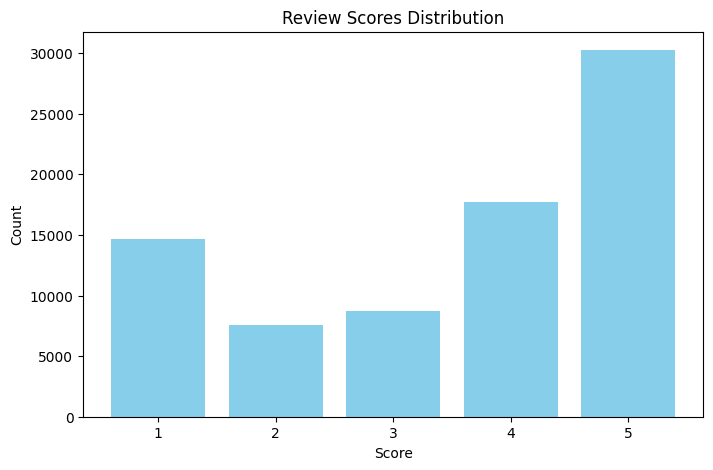

In [ ]:
#PLOTS

#Plot - Review Scores Distribution
score_counts = df_cleaned['review/score'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
plt.bar(score_counts.index, score_counts.values, color='skyblue')
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Review Scores Distribution')
plt.show()

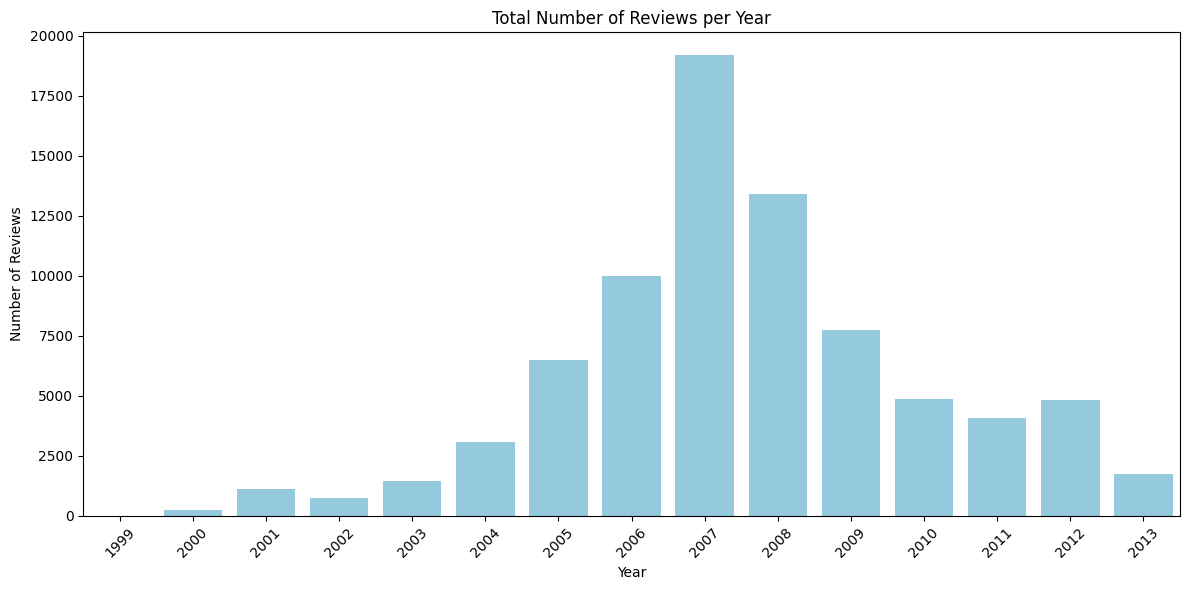

In [ ]:
#Plot - Total Number of Reviews per Year
df_cleaned = df_cleaned.copy()
df_cleaned.loc[:, 'year'] = df_cleaned['review/time'].dt.year
reviews_per_year = df_cleaned.groupby('year').size().reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.barplot(data=reviews_per_year, x='year', y='count', color='skyblue')
plt.title('Total Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

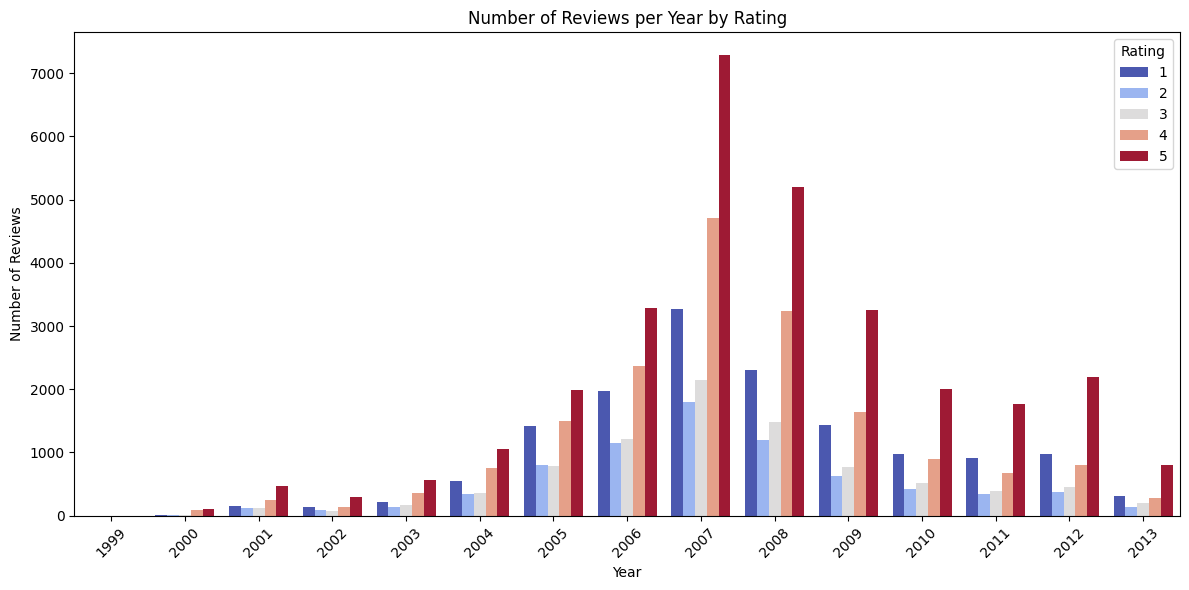

In [ ]:
#Plot - Number of Reviews per Year by Rating
grouped = df_cleaned.groupby(['year', 'review/score']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='year', y='count',  palette='coolwarm', hue='review/score')
plt.title('Number of Reviews per Year by Rating')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.legend(title='Rating')
plt.tight_layout()
plt.show()

Price range: 0.01 to 569.95


<ipython-input-376-98afdf61b264>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_review_group = df_with_prices.groupby(price_bins)['review/score'].mean()


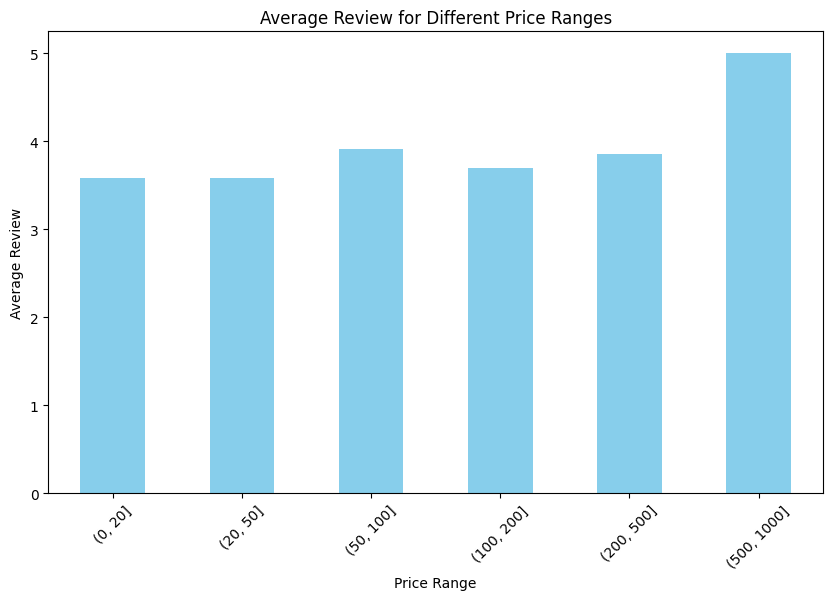

In [ ]:
# Plot - Average Review for Different Price Ranges

#flirt only products with prices
df_with_prices = df_cleaned.loc[df_cleaned['product/price'] != 'unknown', :]

#Convert product/price to float
df_with_prices.loc[:, 'product/price'] = pd.to_numeric(df_with_prices['product/price'], errors='coerce')

#Check min and max price value
min_price = df_with_prices['product/price'].min()
max_price = df_with_prices['product/price'].max()
print(f"Price range: {min_price} to {max_price}")

#create ranges
price_bins = pd.cut(df_with_prices['product/price'], bins=[0, 20, 50, 100, 200, 500, 1000])
#calculate mean price for each price range
price_review_group = df_with_prices.groupby(price_bins)['review/score'].mean()

plt.figure(figsize=(10, 6))
price_review_group.plot(kind='bar', color='skyblue')

# Ustawienia wykresu
plt.title('Average Review for Different Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Average Review')
plt.xticks(rotation=45)
plt.show()


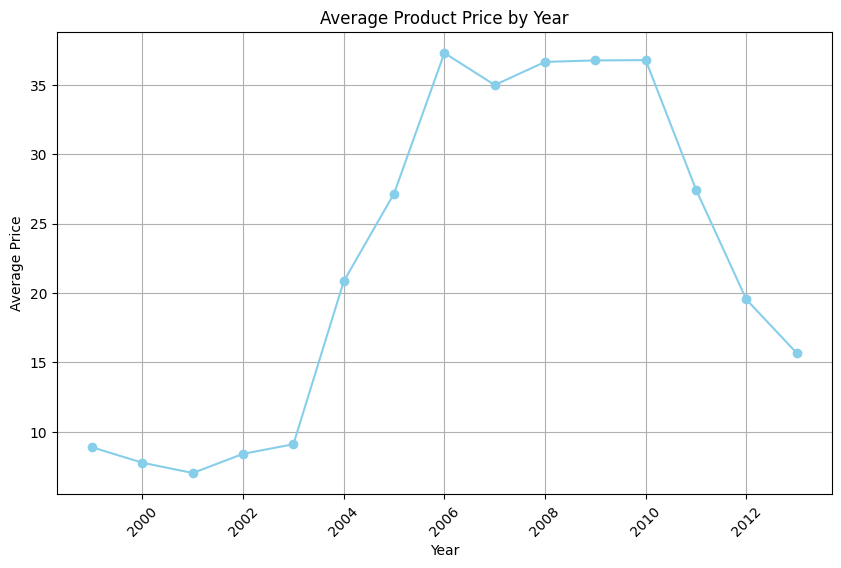

In [ ]:
#Plot - Average Product Price by Year
price_by_year = df_with_prices.groupby('year')['product/price'].mean()
plt.figure(figsize=(10, 6))
price_by_year.plot(kind='line', marker='o', color='skyblue')
plt.title('Average Product Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
